In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
# vals = np.arange(1,11)
# trueWs = []
# JEST = []
# UCIS = []
# LCIS = []
# Nr = 10
# for v in vals:
#     for r in range(Nr):
#         inputfile = '../data/simdata/simdata_p' + str(v) + '_r' + str(r) + '.csv'

#         #inputfile = datadir + 'simdata.csv'

#         df =pd.read_csv(inputfile)
#         trueW = df[df.transect_id<0].wildebeest.values[0]
#         df = df[df.transect_id>0]

#         num_photo = len(df)
        
#         totalarea = df.photo_area.mean()*num_photo
#         density = df.wildebeest.sum()/totalarea
#         ab_est = density*50000*50000
#         print(trueW,ab_est)
        

In [3]:
# max_y = 50000
       
# yvals = np.arange(135,max_y,2500)
# len(yvals)*2500
# t_lengths[0]
# thisT.x#.max()-thisT.x.min()

In [6]:
vals= np.arange(1,11)
trueWs = []
JEST = []
UCIS = []
LCIS = []
Nr = 10

with open('../results/jolly_results.txt', 'w') as f:
    f.writelines('p,r,true,jolly_mean,jolly_mean_frac,jolly_lci,jolly_lci_frac,jolly_uci,jolly_uci_frac\n')

for v in vals:
    for r in range(Nr):
        inputfile = '../data/simdata/simdata_p' + str(v) + '_r' + str(r) + '.csv'

        #inputfile = datadir + 'simdata.csv'

        df =pd.read_csv(inputfile)
        trueW = df[df.transect_id<0].wildebeest.values[0]
        df = df[df.transect_id>0]

        num_photo = len(df)


        m = len(pd.unique(df.transect_id))
        Trs = range(m)
        t_areas = []
        t_lengths = []

        for t in pd.unique(df.transect_id):
            thisT = df[df.transect_id==t]
            t_areas.append(thisT.photo_area.mean())
            t_lengths.append(thisT.x.max()-thisT.x.min())


        px = np.sqrt(np.array(t_areas)/6)
        pwidth = px*3
        pheight = px*2

        ai = np.array(t_lengths)*pwidth

        A = np.sum(np.array(t_lengths)*2500)


        N = m*(A/(np.sum(ai))) 


        t_counts = []
        t_areas = []

        for t in pd.unique(df.transect_id):
            thisT = df[df.transect_id==t]
            t_counts.append(thisT.wildebeest.sum())
            t_areas.append(thisT.photo_area.sum())

        #sum(t_counts*t_areas)

        yi = ai*np.asarray(t_counts)/np.asarray(t_areas)
        yi


        # variance of theoretical no. counted by transect,
        Sy2 = (1/(m-1))*(np.sum((yi-(np.mean(yi)))**2)) 


        # variance of the area of each transect,
        Sa2 = (1/(m-1))*(np.sum((ai-(np.mean(ai)))**2))



        # and the covariance between these
        Sya= (1/(m-1))*(np.sum((ai-(np.mean(ai)))*(yi-(np.mean(yi)))))


        # Est. density = sum of No. counted/area searched.
        R = (np.sum(yi))/(np.sum(ai))


        # Total pop.est. = density*overall survey area
        j_est = R*50000*50000#*A


        # Variance of pop. est.
        Sw2 = ((N*(N-m))/m)*(Sy2-(2*R*Sya)+((R**2)*Sa2))

        # Standard Error:
        SE_Jollys = np.sqrt(Sw2)/np.sqrt(m)

        totalarea = df.photo_area.mean()*num_photo
        density = df.wildebeest.sum()/totalarea
        ab_est = density*50000*50000
        

        ## Results ----
        # Confidence Interval:
        CI_Jollys = 1.96*SE_Jollys
        UCI = j_est+CI_Jollys #UCI
        LCI = j_est-CI_Jollys #LCI
        
        outputstr = ""
        outputstr += str(v) + ","
        outputstr += str(r) + ","
        outputstr += str(trueW) + ","
        outputstr += str(j_est) + ","
        outputstr += str(j_est/trueW) + ","
        outputstr += str(LCI) + ","
        outputstr += str(LCI/trueW) + ","
        outputstr += str(UCI) + ","
        outputstr += str(UCI/trueW) + "\n"
         
        with open('../results/jolly_results.txt', 'a') as f:
            f.writelines(outputstr)


        print("True value: ", trueW, ab_est, totalarea, A, " Jolly estimate: ", j_est, j_est/trueW, " (95% CI: ", LCI, LCI/trueW, ",",UCI, UCI/trueW,")")
        trueWs.append(trueW)
        JEST.append(j_est)
        LCIS.append(LCI)
        UCIS.append(UCI)

JEST = np.array(JEST)
trueWs = np.array(trueWs)
LCIS = np.array(LCIS)
UCIS = np.array(UCIS)

True value:  1239029 1219727.3662551441 97200000.0 2475000000.0  Jolly estimate:  1219727.3662551441 0.9844219677304923  (95% CI:  1110011.7004896242 0.8958722519728143 , 1329443.032020664 1.0729716834881702 )
True value:  1313131 1167824.0740740742 97200000.0 2475000000.0  Jolly estimate:  1167824.0740740742 0.8893431607920871  (95% CI:  1085437.0152853616 0.8266022318301537 , 1250211.1328627868 0.9520840897540206 )
True value:  1338228 1287114.1975308643 97200000.0 2475000000.0  Jolly estimate:  1287114.1975308643 0.9618048624979183  (95% CI:  1180804.729666245 0.882364387582867 , 1393423.6653954836 1.0412453374129698 )
True value:  1265149 1366769.547325103 97200000.0 2475000000.0  Jolly estimate:  1366769.547325103 1.080322987509853  (95% CI:  1245891.192591511 0.9847782297512079 , 1487647.9020586952 1.1758677452684982 )
True value:  1271689 1392592.5925925924 97200000.0 2475000000.0  Jolly estimate:  1392592.5925925924 1.095073239284599  (95% CI:  1221745.465362807 0.9607266126881

In [136]:


JEST = JEST.reshape((-1,Nr))
trueWs = trueWs.reshape((-1,Nr))
LCIS = LCIS.reshape((-1,Nr))
UCIS = UCIS.reshape((-1,Nr))

JEST.shape

(10, 10)

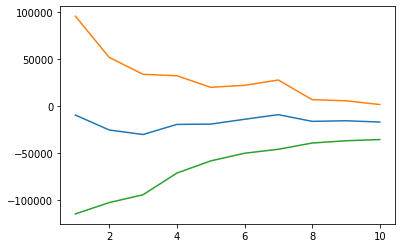

In [137]:
plt.plot(vals,np.mean((JEST-trueWs),axis=1))
#plt.plot(trueWs)
plt.plot(vals,np.mean((UCIS-trueWs),axis=1))
plt.plot(vals,np.mean((LCIS-trueWs),axis=1))


In [138]:
JEST[0]

array([1406090.27777778, 1262555.55555556, 1269277.77777778,
       1394122.68518519, 1209694.44444444, 1336423.61111111,
       1346557.87037037, 1425340.27777778, 1387909.72222222,
       1367615.74074074])

In [ ]:






paste0("True value: ", true_count, " Jolly estimate: ", j_est, " (95% CI: ", LCI, ",",UCI,")")



In [ ]:
{
  library(readr)
  library(ggplot2)
}
 

## Format Point Data
simdata <- read.csv("simdata_p10.npy")
simdata <- as.data.frame(simdata)

# we stored the true count in transect id -1
true_count <- subset(simdata,transect_id<0)$wildebeest

# retain all other 'real' transects
simdata <- subset(simdata,transect_id>0)

m <- length(unique(simdata$transect_id))


Trs <- c(1:m)
t.p.areas <- c(NULL)
t.lengths <- c(NULL)

for(i in 1:m){
  # subset each transect
  trans <- subset(simdata,transect_id==i)
  # for each transect, select the area column 
  p.area <- trans[,5]
  # calculate the mean photo area
  av.p.area <- mean(p.area)
  t.length <- max(trans$x)-min(trans$x)
  t.p.areas <- c(t.p.areas,av.p.area)
  t.lengths <- c(t.lengths,t.length)
}
t.p.a <- as.vector(t.p.areas)
tr.p.area <- cbind(Trs,t.p.a)

t.l <- as.vector(t.lengths)
tr.length <- cbind(Trs,t.l)

## Width of photo (W:H=3:2)
# Area=3x*2x
# Area=6x^2
# So divide average photo area by 6:
p.x.2 <- t.p.a/6
# then square root it:
p.x <- sqrt(p.x.2)
# Then calculate width and height using the ratio above (W=3:H=2)
p.W <- p.x*3 # photo width
p.H <- p.x*2 #photo height
mean(p.W)
mean(p.H)


# Area of transects (metres):
# transect length*average photo width
ai <- tr.length[,2]*p.W
mean(ai)
sum(ai)

# Total area of survey (transects 2500m apart)
A <- sum(tr.length[,2]*2500)

## number of transects needed for 100% cover (N):
N <- m*(A/(sum(ai))) 

## Estimated number of animals that would have been seen if the whole transect 
# was photographed
#wbNum<- as.numeric(as.character(wildebeest$Count))
# Counts per transect
Trs <- c(1:m)
t.counts <- c(NULL)
for(i in 1:m){
  # subset each transect
  trans <- subset(simdata,transect_id==i)
  # select counts (check column)
  t.count <- as.numeric(as.character(trans[,3]))
  # add up total count on each transect
  t.counts <- c(t.counts,sum(t.count))
}
t.counts <- as.vector(t.counts)
transect.counts <- cbind(Trs,t.counts)
mean(transect.counts)

# Now photo areas
Trs <- c(1:m)
t.areas <- c(NULL)
for(i in 1:m){
  trans <- subset(simdata,transect_id==i)
  # for each transect, select the area column 
  t.area <- as.numeric(as.character(trans[,5]))
  # total  area photographed on each transect:
  t.areas <- c(t.areas,sum(t.area))
}
t.areas <- as.vector(t.areas)
t.photo.areas <- cbind(Trs,t.areas)
mean(t.areas)
sum(t.areas)

# number of animals that would have been seen if whole transect photo'd:
yi <- ai*(t.counts/t.areas)
sum(yi)
mean(yi)

## Jolly's formula ----

# variance of theoretical no. counted by transect,
Sy2 <- (1/(m-1))*(sum((yi-(mean(yi)))^2)) 
# variance of the area of each transect,
Sa2 <- (1/(m-1))*(sum((ai-(mean(ai)))^2))
# and the covariance between these
Sya <- (1/(m-1))*(sum((ai-(mean(ai)))*(yi-(mean(yi)))))


# Est. density = sum of No. counted/area searched.
R <- (sum(yi))/(sum(ai))

# Total pop.est. = density*overall survey area
j_est <- R*A

# Variance of pop. est.
Sw2 <- ((N*(N-m))/m)*(Sy2-(2*R*Sya)+((R^2)*Sa2))

# Standard Error:
SE.Jollys <- sqrt(Sw2)/sqrt(m)

## Results ----
# Confidence Interval:
CI.Jollys <- 1.96*SE.Jollys
UCI <- j_est+CI.Jollys #UCI
LCI <- j_est-CI.Jollys #LCI

paste0("True value: ", true_count, " Jolly estimate: ", j_est, " (95% CI: ", LCI, ",",UCI,")")

